In [1]:
import uproot
import pandas as pd
import awkward as ak
import math
import os
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import nbformat
print(nbformat.__version__)

5.10.4


In [2]:
dir = "/work/gbrodbek/FCC_fullsim/FullSim_TauID/files_for_generation_chain"
webpage = "/web/gbrodbek/public_html"

import os

def ensure_directory_exists(file_path):
    if os.path.isdir(file_path):
        directory = file_path
    else:
        directory = os.path.dirname(file_path)

    if directory and not os.path.exists(directory):
        os.makedirs(directory)


In [3]:
with uproot.open(dir+"/condor/outputFiles/output_1279601_5.root") as file:
    tree = file["events;2"]
    df = tree.arrays(library="pd")

hit_x = df['hit_x'][0][4:]
hit_y = df['hit_y'][0][4:]
hit_z = df['hit_z'][0][4:]
hit_e = df['hit_e'][0][4:]
n_hits = df['n_hit'][0] - 4
n_part = df['n_part'][0]
hit_genlinks = df['hit_genlink'][0]

hit_x_1 = df['hit_x'][1][4:]
hit_y_1 = df['hit_y'][1][4:]
hit_z_1 = df['hit_z'][1][4:]
hit_e_1 = df['hit_e'][1][4:]
n_hits_1 = df['n_hit'][1] - 4
n_part_1 = df['n_part'][1]

hit_x_tooManyHits = df['hit_x'][np.argmax(df['n_part'])][4:]
hit_y_tooManyHits = df['hit_y'][np.argmax(df['n_part'])][4:]
hit_z_tooManyHits = df['hit_z'][np.argmax(df['n_part'])][4:]
hit_e_tooManyHits = df['hit_e'][np.argmax(df['n_part'])][4:]
n_hits_tooManyHits = df['n_hit'][np.argmax(df['n_part'])] - 4
n_part_tooManyHits = df['n_part'][np.argmax(df['n_part'])]

print(len(hit_x), len(hit_x_tooManyHits), df['n_part'][np.argmax(df['n_part'])])
print(df['n_part'][349])

FileNotFoundError: [Errno 2] No such file or directory: '/work/gbrodbek/FCC_fullsim/FullSim_TauID/files_for_generation_chain/condor/outputFiles/output_1279601_5.root'

In [ ]:


fig = px.scatter_3d(x=hit_x, y=hit_y, z=hit_z, title='3D Scatter Plot of hits of a random event', size = np.log(hit_e+1), size_max=50);
fig.update_layout(
    annotations=[
        dict(
            text=f"n_hits = {n_hits}, n_parts = {n_part}",
            xref="paper", yref="paper",
            x=0, y=1.05,  # Position relativ zur Grafik (x=0.5 für die Mitte)
            showarrow=False,
            font=dict(size=12)
        )
    ]
);
#fig.show()
#fig.write_html("scatterplot_0.html")


In [ ]:

fig = px.scatter_3d(x=hit_x_tooManyHits, y=hit_y_tooManyHits, z=hit_z_tooManyHits, title='3D Scatter Plot of hits of an event with a lot of particles', size = np.log(hit_e_tooManyHits+1), size_max=50)
fig.update_layout(
    annotations=[
        dict(
            text=f"n_hits = {n_hits_tooManyHits}, n_parts = {n_part_tooManyHits}",
            xref="paper", yref="paper",
            x=0, y=1.05,  # Position relativ zur Grafik (x=0.5 für die Mitte)
            showarrow=False,
            font=dict(size=12)
        )
    ]
);
#fig.show()
#fig.write_html("scatterplot_tooManyHits.html")

In [ ]:
fig = px.scatter_3d(x=hit_x_1, y=hit_y_1, z=hit_z_1, title='3D Scatter Plot of hits of another random event', size = np.log(hit_e_1+1), size_max=50)
fig.update_layout(
    annotations=[
        dict(
            text=f"n_hits = {n_hits_1}, n_parts = {n_part_1}",
            xref="paper", yref="paper",
            x=0, y=1.05,  # Position relativ zur Grafik (x=0.5 für die Mitte)
            showarrow=False,
            font=dict(size=12)
        )
    ]
);
#fig.show()
#fig.write_html("scatterplot_1.html")

In [4]:
def makePlot3d(file_path, event_number, output_path=None, figshow=True):
    with uproot.open(file_path) as file:
        tree = file["events;2"]
        df = tree.arrays(library="pd")
    # Count how many of the hit_e events are -1 at the beginning of the array
    count_neg_ones = 0
    for energy in df['hit_e'][event_number]:
        if energy == -1:
            count_neg_ones += 1
        else:
            break
    hit_x = df['hit_x'][event_number][count_neg_ones:]
    hit_y = df['hit_y'][event_number][count_neg_ones:]
    hit_z = df['hit_z'][event_number][count_neg_ones:]
    hit_e = df['hit_e'][event_number][count_neg_ones:]
    n_hits = df['n_hit'][event_number] - count_neg_ones
    n_part = df['n_part'][event_number]

    fig = px.scatter_3d(x=hit_x, y=hit_y, z=hit_z, title=f'3D Scatter Plot of hits of event nr. {event_number} of the file {file_path}', size = np.log(hit_e+1), size_max=50)
  
    fig.update_layout(
        annotations=[
            dict(
                text=f"n_hits = {n_hits}, n_parts = {n_part}",
                xref="paper", yref="paper",
                x=0, y=1.05,
                showarrow=False,
                font=dict(size=12)
            )
        ]
    )
    if figshow:
        fig.show()
    if output_path:
        ensure_directory_exists(output_path)
        fig.write_html(output_path)
        print("saved at ", output_path)

In [ ]:
#find the 10 events with the most particles
top_10_n_part = df['n_part'].nlargest(10)
top_10_n_part_indices = top_10_n_part.index
print(top_10_n_part_indices)

Index([349, 463, 67, 176, 145, 632, 450, 296, 391, 99], dtype='int64')


In [ ]:
# make plots of the first 10 events and the 10 events with the most particles
j = 0
#for i in top_10_n_part_indices:
#    makePlot3d(dir+"/condor/outputFiles/output_1279601_5.root", i, f"weirdEvents/weirdPlot{i}.html", figshow=False)
#    makePlot3d(dir+"/condor/outputFiles/output_1279601_5.root", j, f"normalEvents/normalPlot{j}.html", figshow=False)
#    j += 1

In [5]:
def plotMostParticles(file_path, output_path=None, figshow=True, n=3):
    with uproot.open(file_path) as file:
        tree = file["events;2"]
        df = tree.arrays(library="pd")
    top_10_n_part = df['n_part'].nlargest(n)
    top_10_n_part_indices = top_10_n_part.index
    for i in top_10_n_part_indices:
        makePlot3d(file_path, i, f"{output_path}/index_{str(i)}.html", figshow)

In [ ]:
a = 78
#plotMostParticles(f"{dir}/condor/outputFiles/output_1279601_{a}.root", output_path = f"{webpage}/plots3d/file{a}")

In [6]:
def index_of_most_particles(file_path, n, nhits=False):
    with uproot.open(file_path) as file:
        tree = file["events;2"]
        df = tree.arrays(library="pd")
    most_particles = df['n_part'].nlargest(n)
    if nhits:
        df_result = most_particles.to_frame()
        df_result['n_hits'] = df['n_hit'][most_particles.index]
        return df_result
    return most_particles

In [ ]:
#for i in range(1, 100):
#    print(index_of_most_particles(f"{dir}/condor/outputFiles/output_1279601_{i}.root", 10).index)
for i in range(1, 5):
    print(index_of_most_particles(f"{dir}/condor/outputFiles/output_1279601_{i}.root", 50, nhits=True))

     n_part  n_hits
463   12532     663
349   10457     576
145    9474     555
67     6906      75
176    5397     468
450    5050     285
632    4732     508
391    1896    1613
296    1447     858
99      843     812
547     667     658
120     550    2385
724     521    1055
117     518    1476
530     491    1453
141     485    1153
421     459    1037
271     456     723
283     444     982
982     443    1325
337     441      82
825     425     317
22      340     658
137     315    1807
867     311    1751
642     307    2381
95      300    1681
162     294     932
125     291    1665
559     284     714
859     282    1091
985     277     912
681     270    1541
211     269    1172
299     265     474
933     253    1525
209     250    1320
30      245    1114
640     235    2189
318     234    1306
13      225    1526
500     222    1301
839     217    2235
609     216    1000
706     212     401
441     211     991
101     207     732
764     202    2294
540     201    1913


In [ ]:
#for i in range(1, 100):
#    indices = list(index_of_most_particles(f"{dir}/condor/outputFiles/output_1279601_{i}.root", 10).index)
#    indices.sort()
#    print(indices)


In [7]:
def openRoots(fileIndex, eventIndices, pandas=False):
    dfs = {}
    with uproot.open(f"{dir}/condor/outputFiles/output_1279601_{fileIndex}.root") as file:
        tree = file["events;2"]
        df = tree.arrays(library="pd")
        for i in eventIndices:
            dfs[i] = df.loc[i]
        if pandas:
            return pd.DataFrame(dfs)
        else:
            return dfs

weirdEvents = [67, 145, 349, 463]
normalEvents = [0, 1, 2, 3]

In [8]:
def openRootsPandas(fileIndex, eventIndices):
    with uproot.open(f"{dir}/condor/outputFiles/output_1279601_{fileIndex}.root") as file:
        tree = file["events;2"]
        df = tree.arrays(library="pd")  # Lade den gesamten DataFrame
        
        # Filtere den DataFrame basierend auf den eventIndices
        filtered_df = df.iloc[eventIndices]
        return filtered_df

In [ ]:
df1 = openRoots(1, weirdEvents + normalEvents)
df2 = openRoots(2, weirdEvents + normalEvents)
df3 = openRoots(3, weirdEvents + normalEvents)
df4 = openRoots(4, weirdEvents + normalEvents)
df5 = openRoots(5, weirdEvents + normalEvents)

In [ ]:
df_weird = [df1[67], df2[145], df2[463], df3[349], df4[463], df5[67], df5[349]]
df_weird_labels = "file 1, event 67", "file 2, event 145", "file 2, event 463", "file 3, event 349", "file 4, event 463", "file 5, event 67", "file 5, event 349"
df_normal = [df1[0], df2[1], df3[0], df4[2], df4[3], df5[1], df5[3]]
df_normal_labels = "file 1, event 0", "file 2, event 1", "file 3, event 0", "file 4, event 2", "file 4, event 3", "file 5, event 1", "file 5, event 3"
print(df1[67]['hit_x'])

[-1.88e+03, -2.08e+03, 933, -1.8e+03, ..., 1.75e+03, -1.33e+03, -1.34e+03]


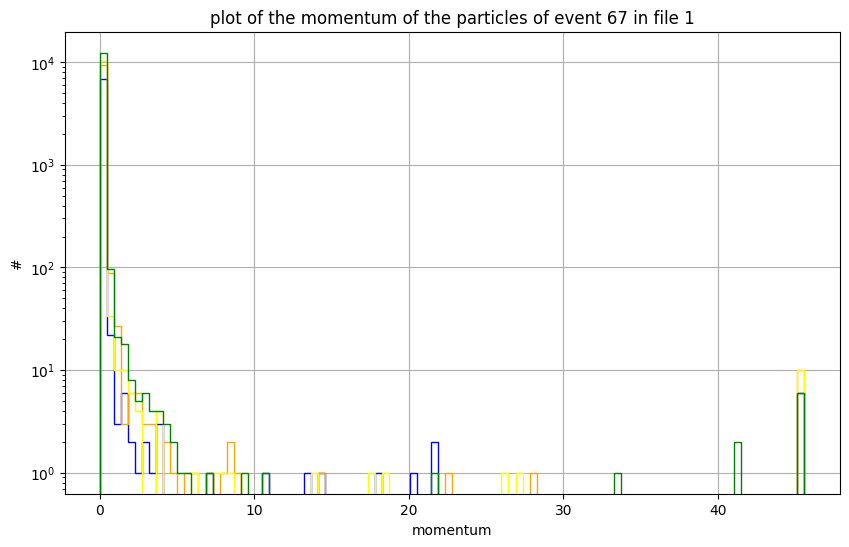

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(df1[67]['part_p'], bins=100, color='blue', edgecolor='blue', histtype='step')
plt.hist(df1[145]['part_p'], bins=100, color='red', edgecolor='orange', histtype='step')
plt.hist(df1[349]['part_p'], bins=100, color='yellow', edgecolor='yellow', histtype='step')
plt.hist(df1[463]['part_p'], bins=100, color='green', edgecolor='green', histtype='step')
plt.title('plot of the momentum of the particles of event 67 in file 1')
plt.xlabel('momentum')
plt.ylabel('#')
plt.yscale('log')
plt.grid(True)
#plt.savefig(output_path)
plt.show()

In [ ]:
pid_dict = {
    1: 'd',
    2: 'u',
    3: 's',
    4: 'c',
    5: 'b',
    6: 't',
    11: 'e',
    12: '$\\nu_e$',
    13: '$\\mu$',
    14: '$\\nu_{mu}$',
    15: '$\\tau$',
    16: '$\\nu_{tau}$',
    21: 'g',
    22: '$\\gamma$',
    23: 'Z',
    24: 'W',
    25: 'H'    
}

NUMBER_OF_PARTICLE_IDS = 50

pid_list = [pid_dict[i] if i in pid_dict.keys() else str(i) for i in range(NUMBER_OF_PARTICLE_IDS)]

In [9]:
from matplotlib.ticker import MultipleLocator

def make_histograms(data, variable, labels, x_label='xlabel', alpha=1, ylog=False, xlog=False, output_path=None, min=0, max=100, binsize=1, noSettings=False, pid=False, show_figure=True, histtype='step', density=False):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'black', 'brown', 'grey']
    if noSettings:
        for i in range(len(data)):
            plt.hist(data[i][variable], bins=100, color=colors[i], edgecolor=colors[i], histtype=histtype, alpha=alpha, label=labels[i], density=density)
    else:
        for i in range(len(data)):
            plt.hist(data[i][variable], bins=np.arange(min, max, binsize), color=colors[i], edgecolor=colors[i], histtype=histtype, alpha=alpha, label=labels[i], density=density)
            ax = plt.gca()
            ax.xaxis.set_minor_locator(MultipleLocator(binsize))  # add small lines on x-axis
            if pid:
                #ax.tick_params(axis='x', rotation=45)
                ax.set_xticks(np.arange(len(pid_list))+0.5)
                ax.set_xticklabels(pid_list)
                ax.set_xlim(min, max)
            #else:
                #plt.grid(True)

    plt.title(f'plot of {variable}')
    plt.xlabel(x_label)
    if density:
        plt.ylabel('density')
    else:
        plt.ylabel('count')
    if ylog:
        plt.yscale('log')
    if xlog:
        plt.xscale('log')
    
    plt.legend()

    if output_path:
        ensure_directory_exists(output_path)
        plt.savefig(f'{output_path}.png')
        print("saved in ", output_path)
    #plt.savefig(output_path)
    if show_figure:
        plt.show()
    else:
        plt.close()

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/part_p


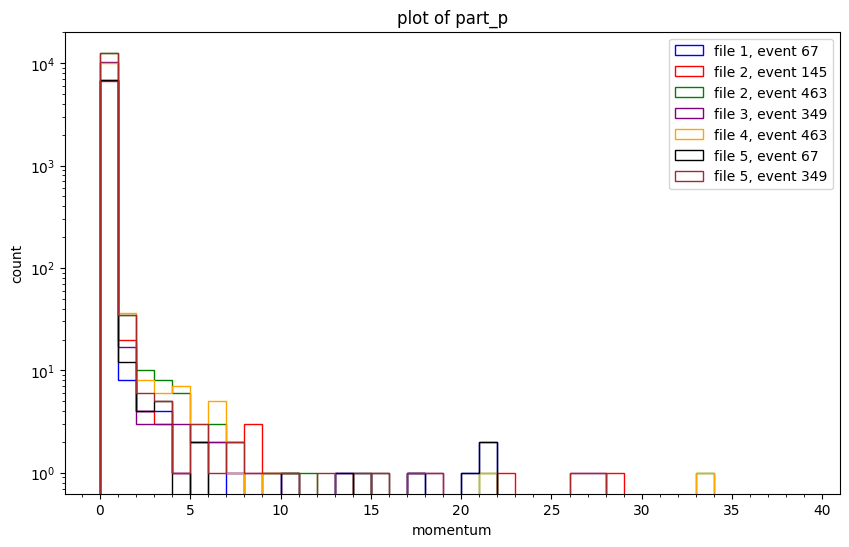

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/pid1


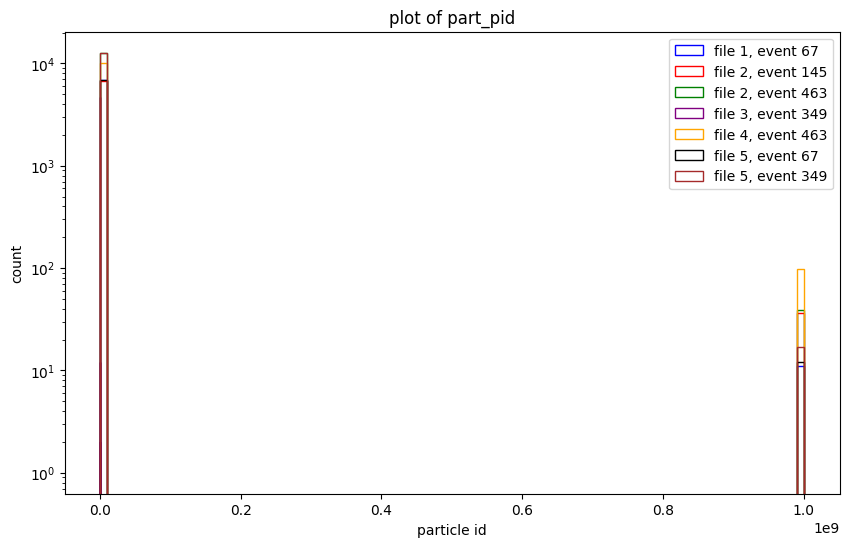

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/pid2


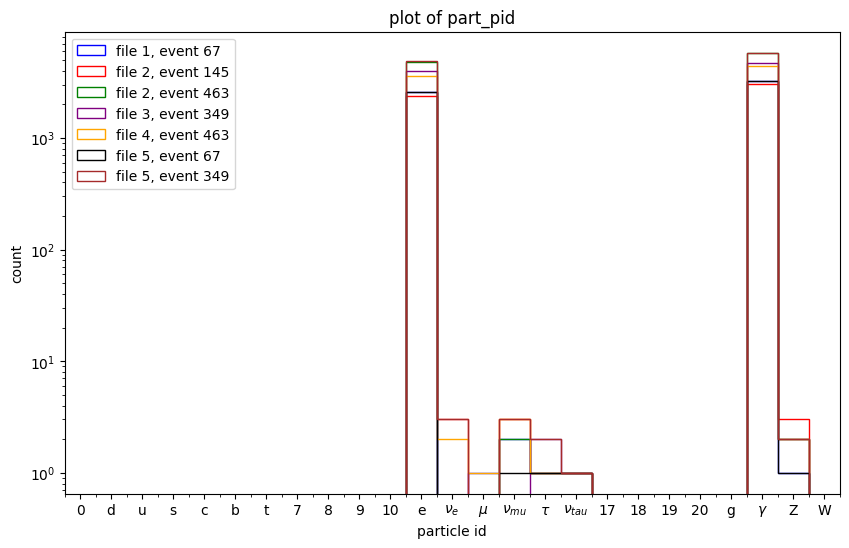

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/pid3


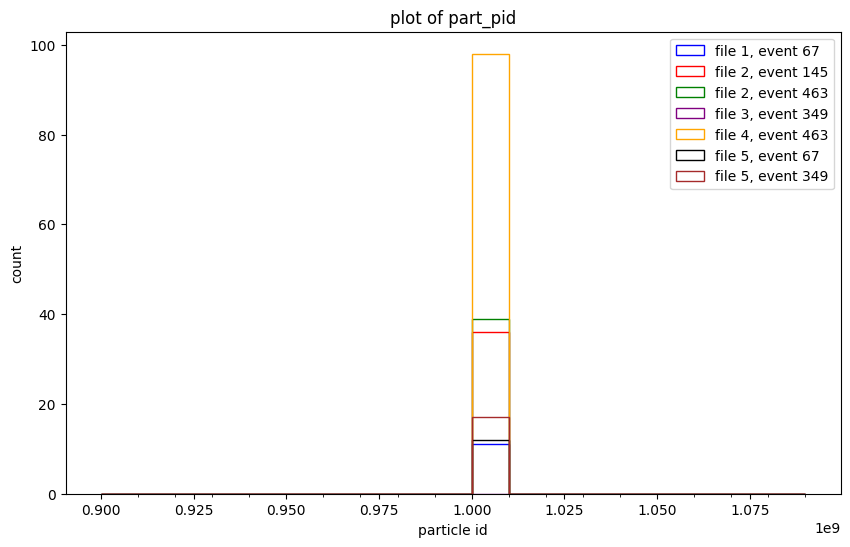

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/theta


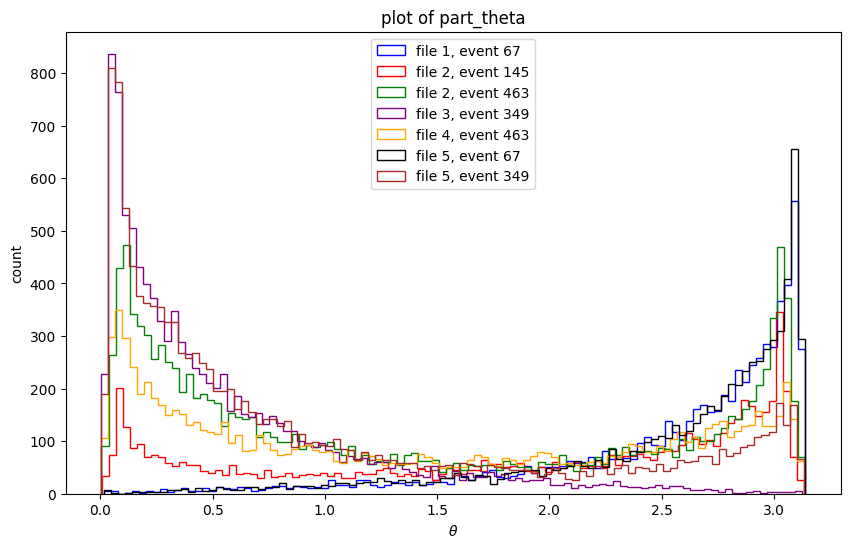

saved in  /web/gbrodbek/public_html/compare_weird_normal/weird_events/phi


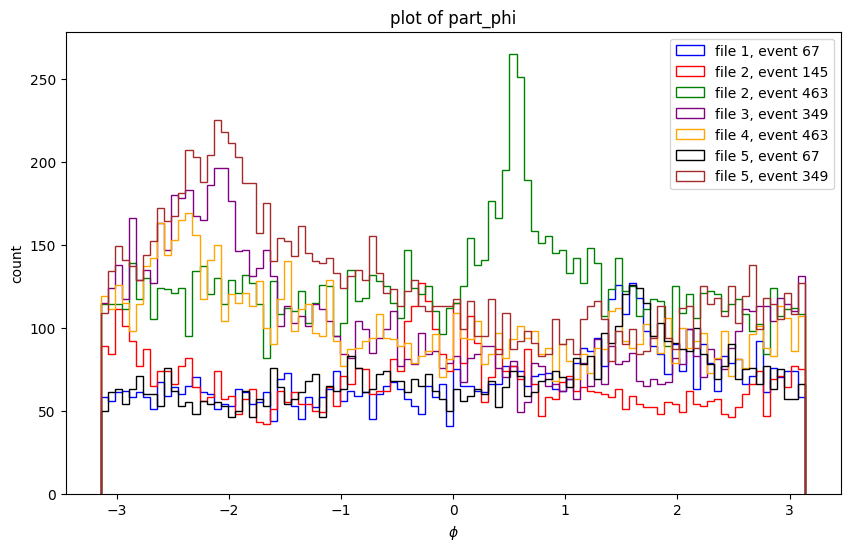

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/part_p


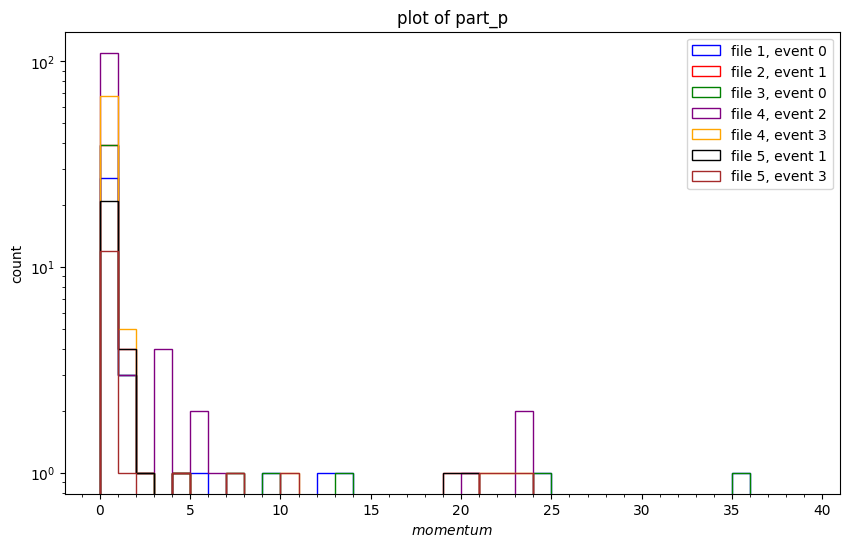

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/pid1


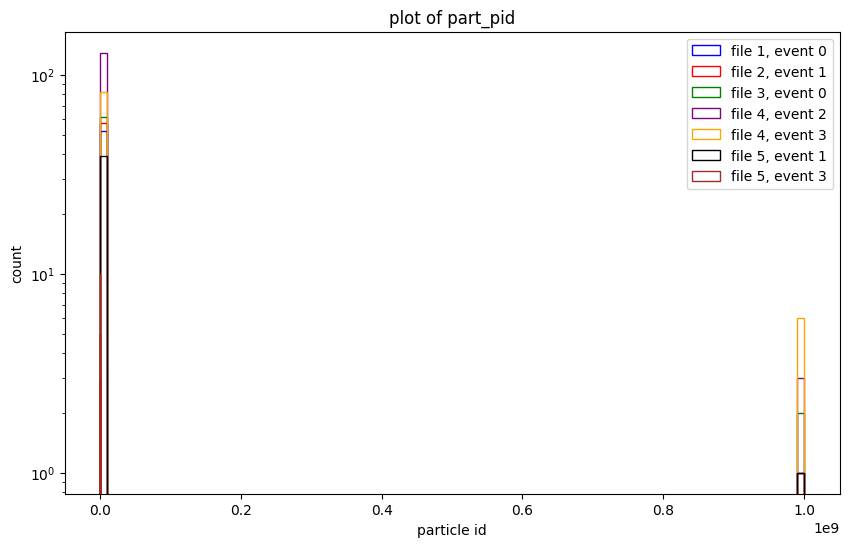

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/pid2


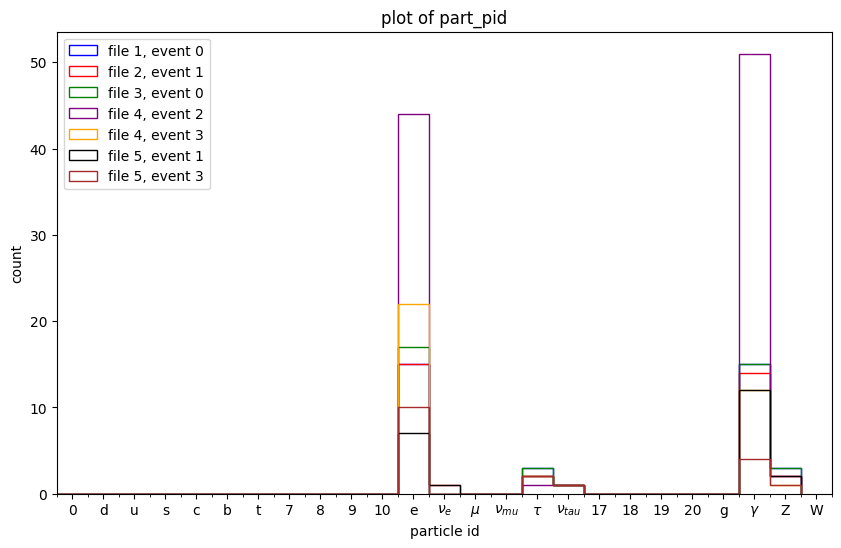

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/pid3


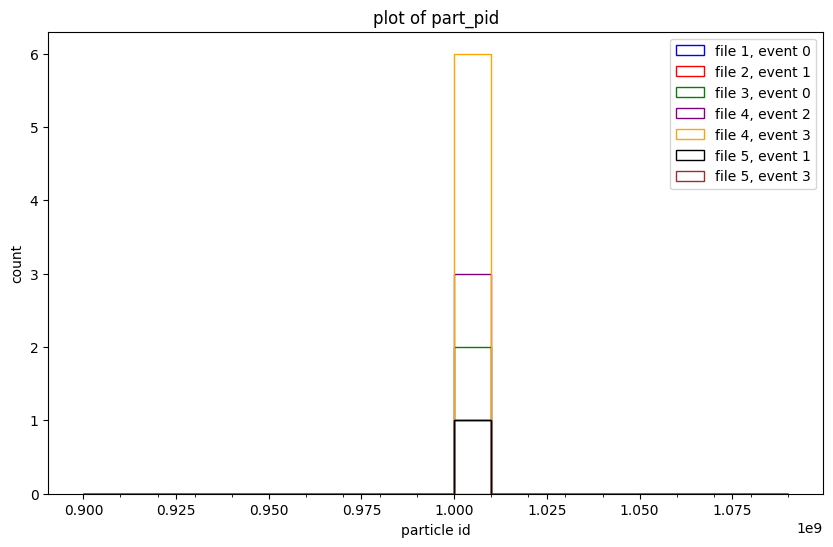

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/theta


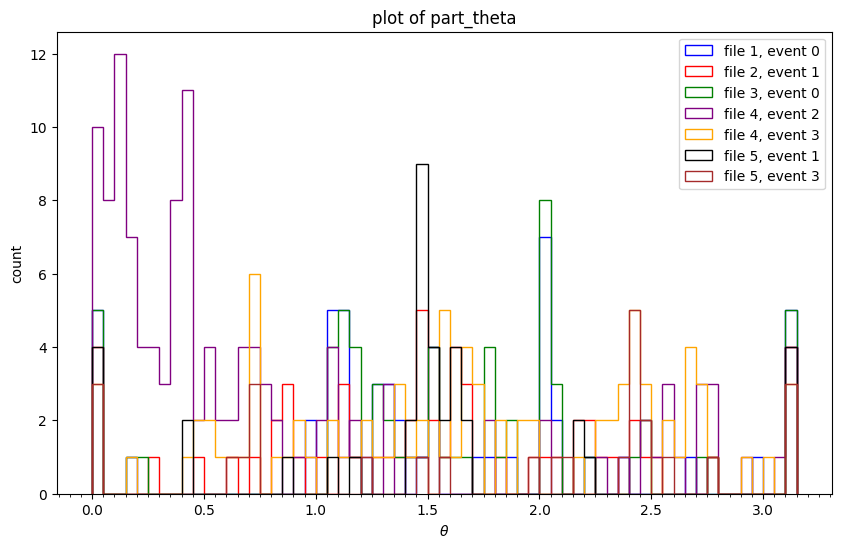

saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/phi


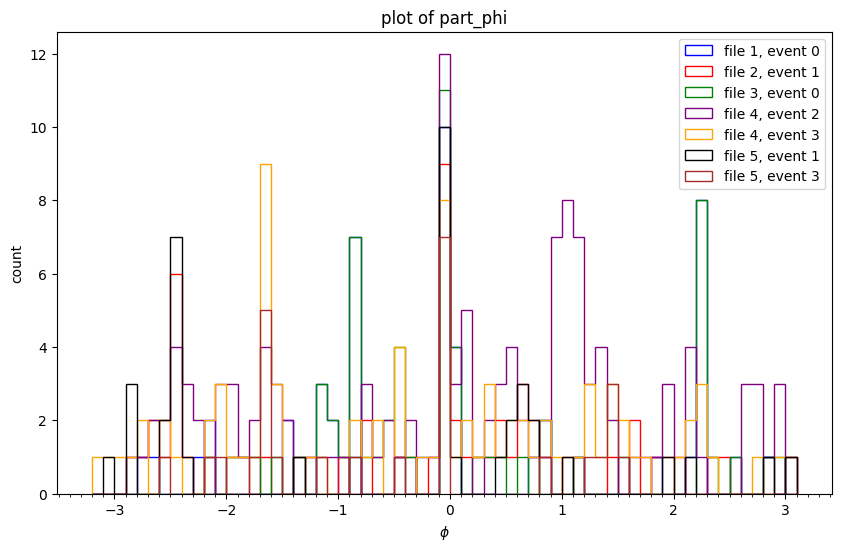

In [ ]:
show_fig = True
make_histograms(df_weird, 'part_p', df_weird_labels, x_label='momentum', alpha=1, ylog=True, min=0, max=40, binsize=1, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/part_p")
make_histograms(df_weird, 'part_pid', df_weird_labels, x_label='particle id', alpha=1, ylog=True, noSettings=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/pid1")
make_histograms(df_weird, 'part_pid', df_weird_labels, x_label='particle id', alpha=1, ylog=True, min=0, max=25, pid=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/pid2")
make_histograms(df_weird, 'part_pid', df_weird_labels, x_label='particle id', alpha=1, ylog=False, min=0.9*10**9, max=1.1*10**9, binsize=10**7, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/pid3")
make_histograms(df_weird, 'part_theta', df_weird_labels, x_label='$\\theta$', alpha=1, ylog=False, noSettings=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/theta")
make_histograms(df_weird, 'part_phi', df_weird_labels, x_label='$\\phi$', alpha=1, ylog=False, noSettings=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/weird_events/phi")
make_histograms(df_normal, 'part_p', df_normal_labels, x_label='$momentum$', alpha=1, ylog=True, min=0, max=40, binsize=1, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/part_p")
make_histograms(df_normal, 'part_pid', df_normal_labels, x_label='particle id', alpha=1, ylog=True, noSettings=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/pid1")
make_histograms(df_normal, 'part_pid', df_normal_labels, x_label='particle id', alpha=1, ylog=False, min=0, max=25, pid=True, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/pid2")
make_histograms(df_normal, 'part_pid', df_normal_labels, x_label='particle id', alpha=1, ylog=False, min=0.9*10**9, max=1.1*10**9, binsize=10**7, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/pid3")
make_histograms(df_normal, 'part_theta', df_normal_labels, x_label='$\\theta$', alpha=1, ylog=False, min=0, max=3.2, binsize=0.05, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/theta")
make_histograms(df_normal, 'part_phi', df_normal_labels, x_label='$\\phi$', alpha=1, ylog=False, min=-3.2, max=3.2, binsize=0.1, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/phi")



saved in  /web/gbrodbek/public_html/compare_weird_normal/normal_events/pid3


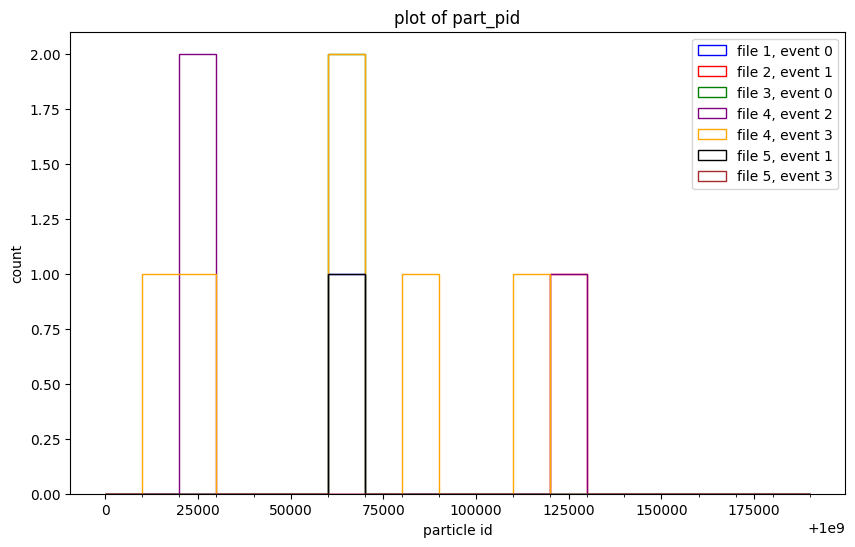

In [ ]:
make_histograms(df_normal, 'part_pid', df_normal_labels, x_label='particle id', alpha=1, ylog=False, min=1000000000, max=1000200000, binsize=10000, show_figure=show_fig, output_path=f"{webpage}/compare_weird_normal/normal_events/pid3")


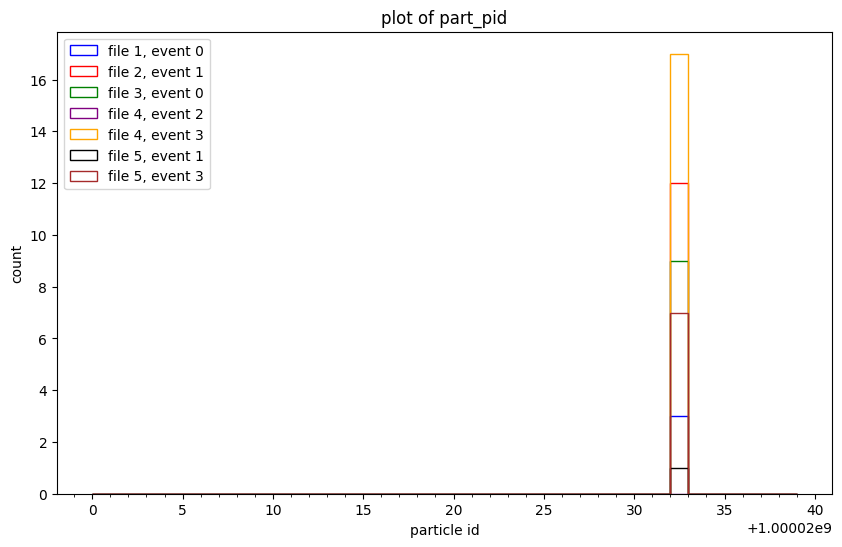

In [ ]:
make_histograms(df_weird, 'part_pid', df_normal_labels, x_label='particle id', alpha=1, ylog=False, min=1000020000, max=1000020040, binsize=1, show_figure=show_fig)


In [ ]:

pd_df1 = openRootsPandas(1, weirdEvents, normalEvents)
pd_df2 = openRootsPandas(2, weirdEvents, normalEvents)
pd_df3 = openRootsPandas(3, weirdEvents, normalEvents)
pd_df4 = openRootsPandas(4, weirdEvents, normalEvents)
pd_df5 = openRootsPandas(5, weirdEvents, normalEvents)

TypeError: openRootsPandas() takes 2 positional arguments but 3 were given

In [ ]:
all_normal = pd.concat([pd.DataFrame(pd_df1.loc[0]), pd.DataFrame(pd_df2.loc[1]), pd.DataFrame(pd_df3.loc[0]), pd.DataFrame(pd_df4.loc[2]), pd.DataFrame(pd_df4.loc[3]), pd.DataFrame(pd_df5.loc[1]), pd.DataFrame(pd_df5.loc[3], )], axis=1).T 
all_weird = pd.concat([pd.DataFrame(pd_df1.loc[67]), pd.DataFrame(pd_df2.loc[145]), pd.DataFrame(pd_df2.loc[463]), pd.DataFrame(pd_df3.loc[349]), pd.DataFrame(pd_df4.loc[463]), pd.DataFrame(pd_df5.loc[67]), pd.DataFrame(pd_df5.loc[349])], axis=1).T
all_normal.reset_index(drop=True, inplace=True)
all_weird.reset_index(drop=True, inplace=True)

In [ ]:
all_normal_2 = []
for i in range(4):
    all_normal_2.append(pd.DataFrame(pd_df1.loc[i]))
    all_normal_2.append(pd.DataFrame(pd_df2.loc[i]))
    all_normal_2.append(pd.DataFrame(pd_df3.loc[i]))
    all_normal_2.append(pd.DataFrame(pd_df4.loc[i]))
    all_normal_2.append(pd.DataFrame(pd_df5.loc[i]))
all_normal_2 = pd.concat(all_normal_2, axis=1).T


In [10]:
def create_arrays(dataframe, columns):
    arrays = {}
    for column in columns:
        arrays[column] = np.concatenate(dataframe[column])
    return arrays

In [ ]:
normal_arrays = create_arrays(all_normal_2, ['part_p', 'part_pid', 'part_theta', 'part_phi'])
weird_arrays = create_arrays(all_weird, ['part_p', 'part_pid', 'part_theta', 'part_phi'])

print(normal_arrays)



{'part_p': <Array [45.6, 45.6, 2.56e-06, ..., 0.00157, 0.00172] type='1301 * float32'>, 'part_pid': <Array [11, 11, 22, -11, -11, ..., 11, 11, 11, 22, 11] type='1301 * float32'>, 'part_theta': <Array [0.015, 0.015, 0.015, 3.13, ..., 2.45, 1.96, 2.05] type='1301 * float32'>, 'part_phi': <Array [0, -1.59e-19, 0, 0, ..., -1.13, -2.03, -1.53] type='1301 * float32'>}


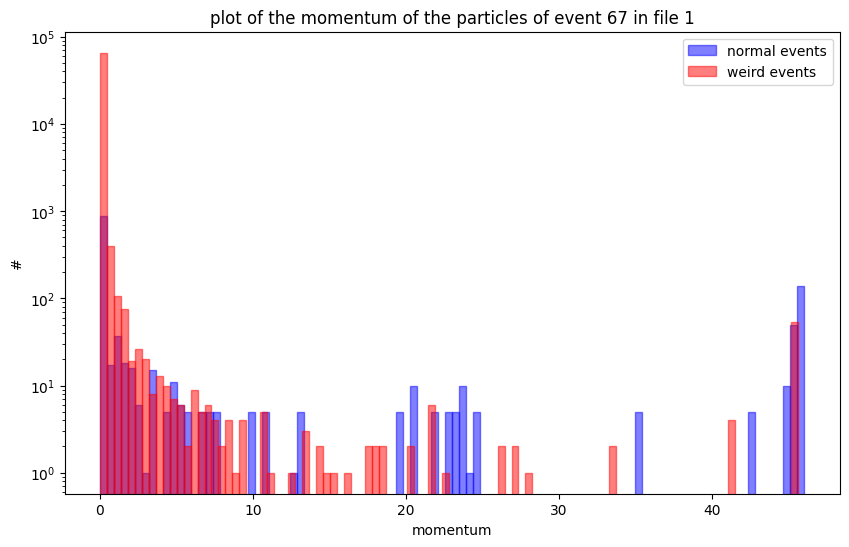

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(normal_arrays['part_p'], bins=100, color='blue', edgecolor='blue', histtype='bar', alpha=0.5, label='normal events')
plt.hist(weird_arrays['part_p'], bins=100, color='red', edgecolor='red', histtype='bar', alpha=0.5, label='weird events')
plt.title('plot of the momentum of the particles of event 67 in file 1')
plt.xlabel('momentum')
plt.ylabel('#')
plt.yscale('log')
plt.legend()
#plt.savefig(output_path)
plt.show()

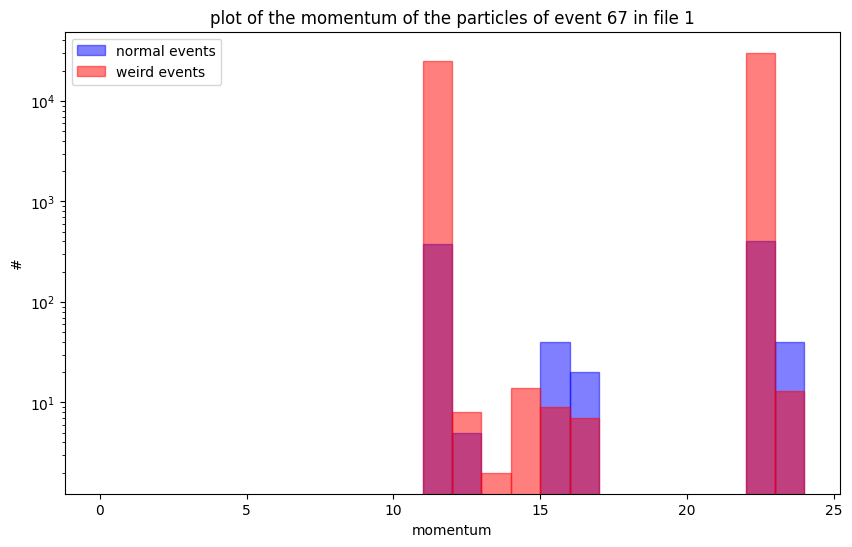

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(normal_arrays['part_pid'], bins=np.arange(0, 25, 1), color='blue', edgecolor='blue', histtype='bar', alpha=0.5, label='normal events')
plt.hist(weird_arrays['part_pid'], bins=np.arange(0, 25, 1), color='red', edgecolor='red', histtype='bar', alpha=0.5, label='weird events')
plt.title('plot of the momentum of the particles of event 67 in file 1')
plt.xlabel('momentum')
plt.ylabel('#')
plt.yscale('log')
plt.legend()
#plt.savefig(output_path)
plt.show()

saved in  /web/gbrodbek/public_html/compare_weird_normal/comparison/part_p


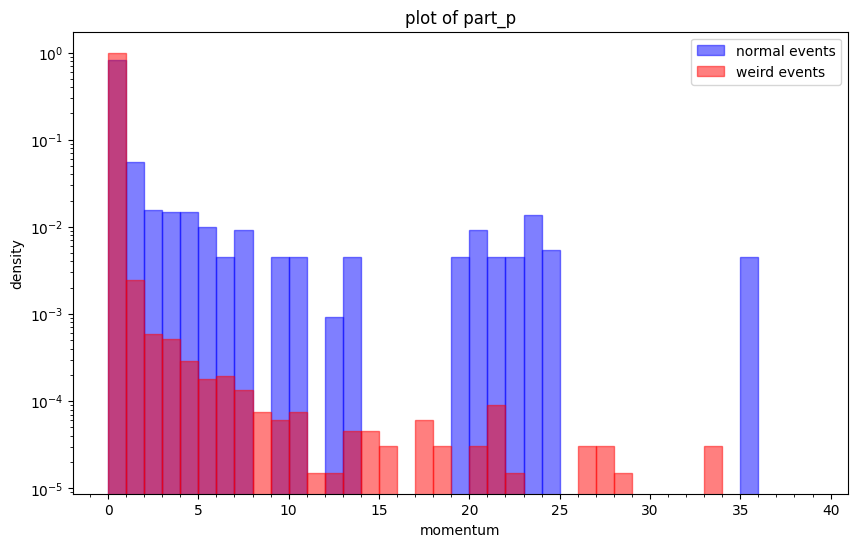

saved in  /web/gbrodbek/public_html/compare_weird_normal/comparison/part_pid


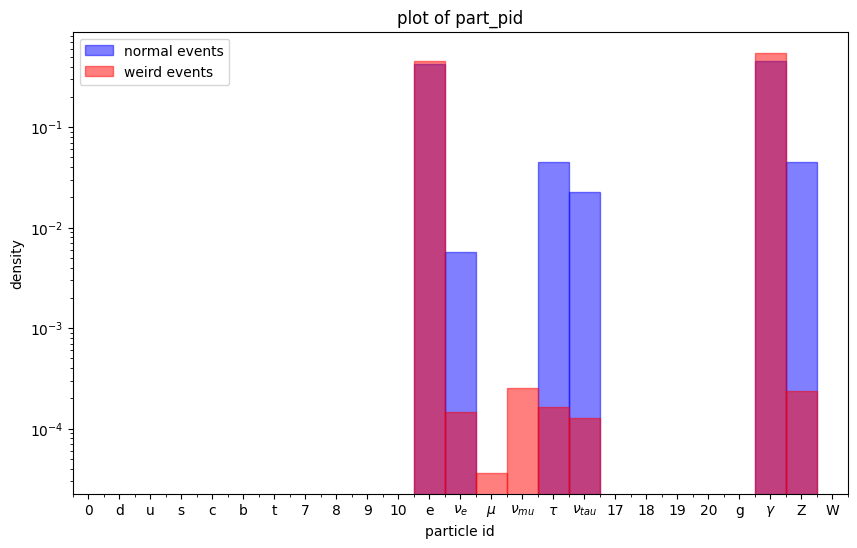

In [ ]:

make_histograms([normal_arrays, weird_arrays], 'part_p', ["normal events", "weird events"], x_label='momentum', alpha=0.5, ylog=True, min=0, max=40, binsize=1, show_figure=show_fig, histtype='bar', output_path=f"{webpage}/compare_weird_normal/comparison/part_p", density=True)
make_histograms([normal_arrays, weird_arrays], 'part_pid', ["normal events", "weird events"], x_label='particle id', alpha=0.5, ylog=True, min=0, max=25, binsize=1, show_figure=show_fig, histtype='bar', pid=True, output_path=f"{webpage}/compare_weird_normal/comparison/part_pid", density=True)


saved in  /web/gbrodbek/public_html/compare_weird_normal/comparison/part_theta2


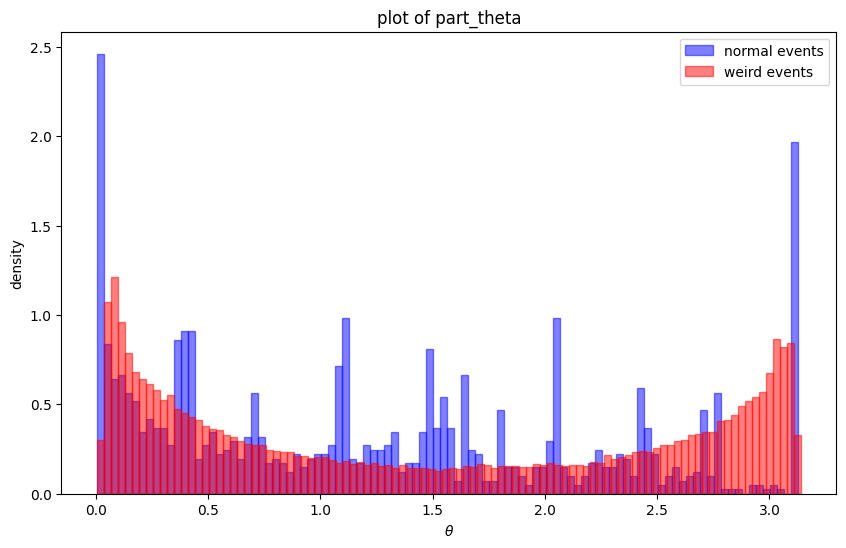

saved in  /web/gbrodbek/public_html/compare_weird_normal/comparison/part_phi2


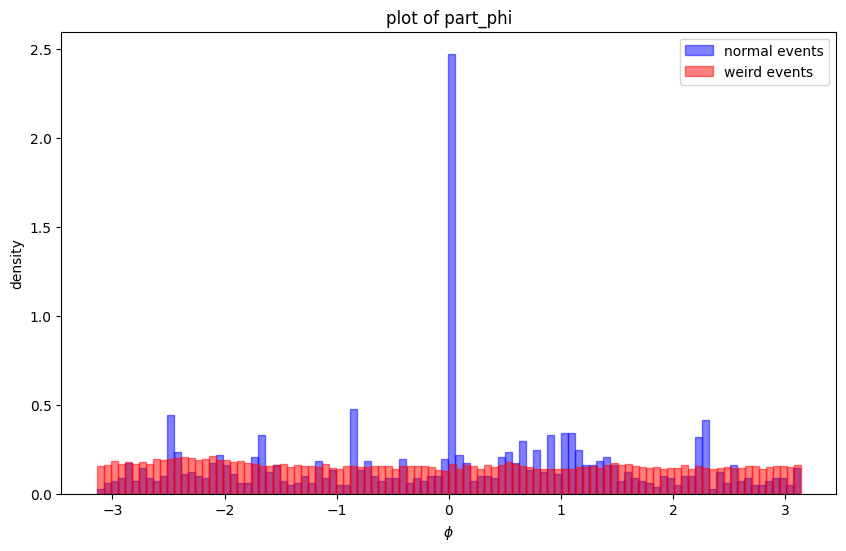

In [ ]:
make_histograms([normal_arrays, weird_arrays], 'part_theta', ["normal events", "weird events"], x_label=f'$\\theta$', alpha=0.5, ylog=False, noSettings=True, show_figure=show_fig, histtype='bar', density=True, output_path=f"{webpage}/compare_weird_normal/comparison/part_theta2")
make_histograms([normal_arrays, weird_arrays], 'part_phi', ["normal events", "weird events"], x_label=f'$\\phi$', alpha=0.5, ylog=False, noSettings=True, show_figure=show_fig, histtype='bar', density=True, output_path=f"{webpage}/compare_weird_normal/comparison/part_phi2")


<Figure size 1000x600 with 0 Axes>

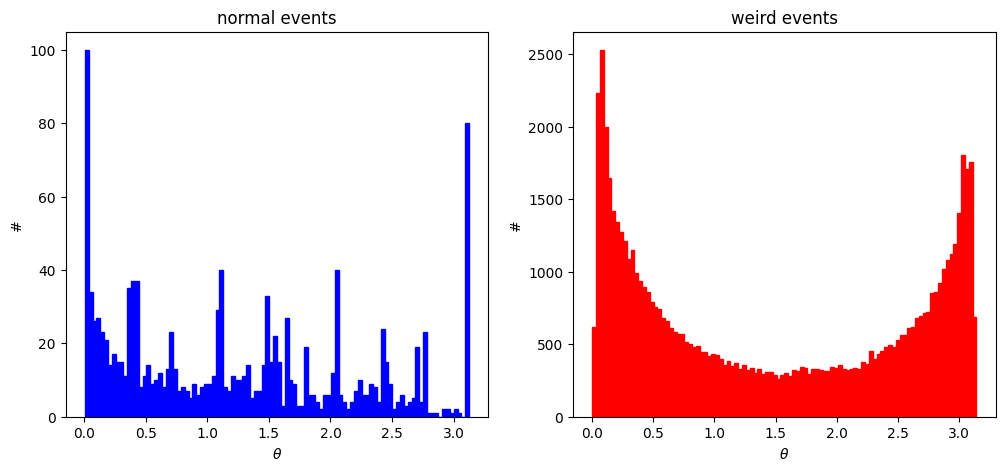

In [ ]:
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.title(f'plot of $\\theta$')

axs[0].hist(normal_arrays['part_theta'], bins=100, color='blue', edgecolor='blue', histtype='bar', alpha=1, label='normal events')
axs[0].set_title('normal events')
axs[0].set_xlabel(f'$\\theta$')
axs[0].set_ylabel('#')


axs[1].hist(weird_arrays['part_theta'], bins=100, color='red', edgecolor='red', histtype='bar', alpha=1, label='weird events')
axs[1].set_title('weird events')
axs[1].set_xlabel(f'$\\theta$')
axs[1].set_ylabel('#')

plt.savefig(f"{webpage}/compare_weird_normal/comparison/part_theta")
plt.show()

<Figure size 1000x600 with 0 Axes>

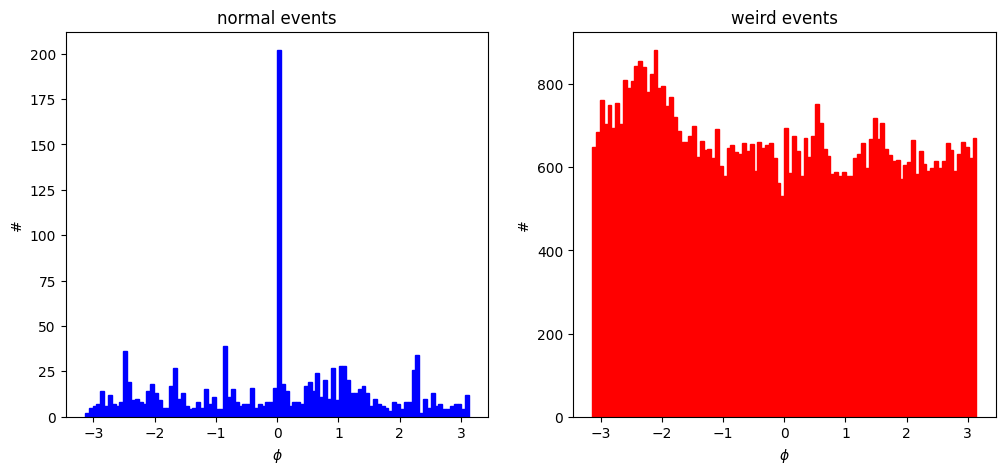

In [ ]:
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.title(f'plot of $\\phi$')

axs[0].hist(normal_arrays['part_phi'], bins=100, color='blue', edgecolor='blue', histtype='bar', alpha=1, label='normal events')
axs[0].set_title('normal events')
axs[0].set_xlabel(f'$\\phi$')
axs[0].set_ylabel('#')


axs[1].hist(weird_arrays['part_phi'], bins=100, color='red', edgecolor='red', histtype='bar', alpha=1, label='weird events')
axs[1].set_title('weird events')
axs[1].set_xlabel(f'$\\phi$')
axs[1].set_ylabel('#')

plt.savefig(f"{webpage}/compare_weird_normal/comparison/part_phi")
plt.show()

In [14]:
def rootsToDataframe(filepath):
    with uproot.open(filepath) as file:
        tree = file["events;11"]
        df = tree.arrays(library="pd")  # Lade den gesamten DataFrame
        return df

In [ ]:
df = rootsToDataframe("/ceph/gbrodbek/data/signal_tau/outputFiles/output_1149668_0.root")
df1 = rootsToDataframe("/ceph/gbrodbek/data/background/outputFiles/background_1151259_0.root")
df2 = rootsToDataframe(dir + "/condor/outputFiles/output_1279601_5.root")
df3 = rootsToDataframe(dir + "/condor_background/outputFiles/background_output_1312570_5.root")

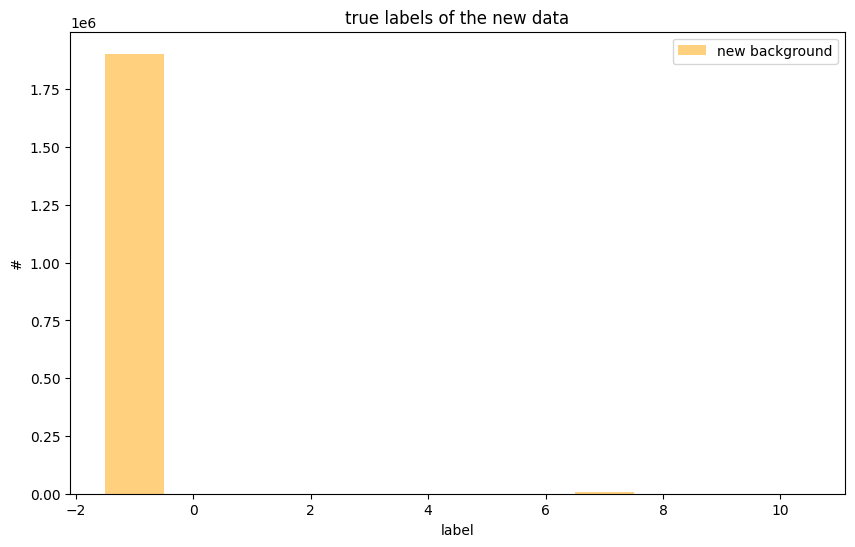

In [ ]:
plt.figure(figsize=(10, 6))

#plt.hist(np.concatenate(df.label_true.values), histtype='bar', color='cornflowerblue', bins=np.arange(-1.5, 11.5, 1), label='new signal', alpha=0.5)
plt.hist(np.concatenate(df1.label_true.values), histtype='bar', color='orange', bins=np.arange(-1.5, 11.5, 1), label='new background', alpha=0.5)
plt.title('true labels of the new data')
plt.xlabel('label')
plt.ylabel('#')
#plt.yscale('log')
plt.legend()
#plt.savefig(output_path)
plt.show()

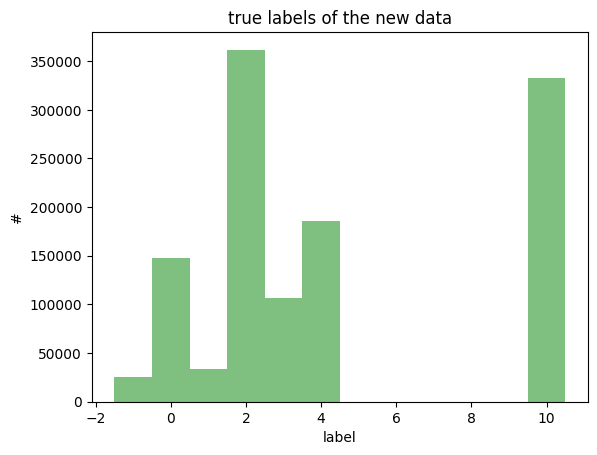

In [ ]:
plt.hist(np.concatenate(df2.label_true.values), histtype='bar', color='green', bins=np.arange(-1.5, 11.5, 1), label='old signal', alpha=0.5)
plt.hist(np.concatenate(df3.label_true.values), histtype='bar', color='red', bins=np.arange(-1.5, 11.5, 1), label='old background', alpha=0.5)
plt.title('true labels of the new data')
plt.xlabel('label')
plt.ylabel('#')
#plt.yscale('log')
#plt.legend()
#plt.savefig(output_path)
plt.show()

In [23]:
df = rootsToDataframe('/ceph/gbrodbek/data/bhabha_scattering/outputFiles/bhabha_scattering_1192571_1.root')

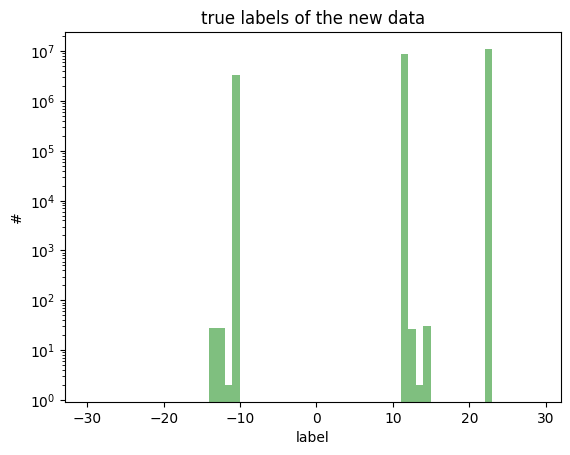

In [24]:
plt.hist(np.concatenate(df.part_pid.values), histtype='bar', color='green', bins=np.arange(-30, 30, 1), alpha=0.5)
plt.title('true labels of the new data')
plt.xlabel('label')
plt.ylabel('#')
plt.yscale('log')
#plt.legend()
#plt.savefig(output_path)
plt.show()

In [21]:
np.unique(np.concatenate(df.part_pid.values))

<Array [-211, -14, -13, -11, ..., 1e+09, 1e+09, 1e+09] type='85 * float32'>